# 3C454.3 analysis notebook
## Prerequisities: in order to run this notebook you need the AGILE data.

In [35]:
from agilepy.api.AGAnalysis import AGAnalysis

In [36]:
%matplotlib notebook

## Analysis name

In [37]:
user = "bulgarelli"
sourceName = "3C454d3"
analysisname = user+"_"+sourceName

In [38]:
print("Analysis:",analysisname)

Analysis: bulgarelli_3C454d3


## Configuration 

In [39]:
tmin = 55513.0 # 2010-11-05 00:00:00.000 UTC
tmax = 55520.0 # 2010-12-05 00:00:00.000 UTC
timetype = "MJD" # "MJD" OR "TT"
glon = 86.11
glat = -38.18
outDir = f"$HOME/agilepy_analysis/{analysisname}"

In [40]:
config = """
input:
  evtfile: /AGILE_PROC3/FM3.119_ASDC2/INDEX/EVT.index
  logfile: /AGILE_PROC3/DATA_ASDC2/INDEX/LOG.log.index

output:
  outdir: %s
  filenameprefix: 3C454d3_product
  logfilenameprefix: 3C454d3_log
  verboselvl: 1

selection:
  tmin: %f
  tmax: %f
  timetype: %s
  glon: %f
  glat: %f
  fovradmax: 60
  albedorad: 80
  proj: ARC
  
maps:
  mapsize: 40
  spectralindex: 2.1
  timestep: 160
  binsize: 0.25
  energybins:
    - 100, 10000
  fovbinnumber: 1
  

model:
  modelfile: null
  galmode: 1
  isomode: 1
  galcoeff: null
  isocoeff: null
  emin_sources: 100
  emax_sources: 10000


mle:
  ranal: 10
  ulcl: 2
  loccl: 95
  expratioevaluation: yes
  expratio_minthr: 0
  expratio_maxthr: 15
  expratio_size: 10  
  
"""%(outDir, tmin, tmax, timetype, glon, glat)

with open("./agilepy_conf.yaml", "w") as cf:
    cf.write(config)

## Obtaining the AGAnalysis object

In [41]:
ag = AGAnalysis("./agilepy_conf.yaml")

2020-03-11 15:48:40,302 [INFO    ] [AgilepyLogger] File and Console loggers are active. Log file: /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/logs/3C454d3_log.log
2020-03-11 15:48:40,302 [INFO    ] [AgilepyLogger] File and Console loggers are active. Log file: /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/logs/3C454d3_log.log


## Sources hypothesis

In [42]:
sources = ag.loadSourcesFromCatalog("2AGL", rangeDist = (0, 5))

2020-03-11 15:48:42,016 [INFO    ] [SourcesLibrary] Loaded 2 sources. Total sources: 2
2020-03-11 15:48:42,016 [INFO    ] [SourcesLibrary] Loaded 2 sources. Total sources: 2


In [43]:
for s in sources:
    print(s)


-----------------------------------------------------------
Source name: 2AGLJ2247+1558 (PointSource)
  * Position:
	- start_pos: (84.2229, -37.4782)
	- dist from (l,b): 1.6474
  * Spectrum: (PowerLaw)
	- flux: 6.05327e-08
	- index: 2.75651
  * Free params: none
-----------------------------------------------------------

-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: none
-----------------------------------------------------------


## Adding a source at runtime

In [44]:
#newSourceDict = {
#    "glon" : 79.3,
#    "glat": 0.554,
#    "spectrumType" : "PowerLaw",
#    "flux": 1.69737e-07,
#    "index": 2.1
#}

#s = ag.addSource("CYGX3", newSourceDict)

#print(s)

## Deleting sources
Selection params = [name, dist, flux, sqrtts]

In [45]:
deletedSources = ag.deleteSources('flux <= 10e-08')

2020-03-11 15:48:47,113 [INFO    ] [SourcesLibrary] Deleted 1 sources.
2020-03-11 15:48:47,113 [INFO    ] [SourcesLibrary] Deleted 1 sources.


## Selecting sources

In [46]:
sources = ag.selectSources("flux > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: none
-----------------------------------------------------------


## Free a source's parameter
Freeable params = [flux, index, index1, index2, cutoffEnergy, pivotEnergy, curvature, index2]

In [47]:
affectedSources = ag.freeSources('name == "2AGLJ2254+1609"', "flux", True)

In this example, only one source is affected.

In [48]:
for source in affectedSources:
    print(source)


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource)
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
-----------------------------------------------------------


## Analysis

In [49]:
maplistfile = ag.generateMaps()

2020-03-11 15:49:36,248 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-11 15:49:36,248 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-11 15:49:41,151 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/maps/3C454d3_product_EMIN00100_EMAX10000_01.cts.gz']
2020-03-11 15:49:41,151 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/maps/3C454d3_product_EMIN00100_EMAX10000_01.cts.gz']
2020-03-11 15:49:41,154 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-11 15:49:41,154 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-11 15:50:07,594 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/maps/3C454d3_product_EMIN00100_EMAX10000_01.exp.gz']
2020-03-11 15:50:07,594 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/h

In [50]:
! cat $maplistfile

/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/maps/3C454d3_product_EMIN00100_EMAX10000_01.cts.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/maps/3C454d3_product_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-154840/maps/3C454d3_product_EMIN00100_EMAX10000_01.gas.gz 30 -1 -1


2020-03-11 15:54:12,356 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.
2020-03-11 15:54:12,356 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.
2020-03-11 15:54:12,360 [INFO    ] [PlottingUtils] The region catalog /home/rt/.conda/envs/agilepy/agiletools/catalogs/2AGL_2.reg will be loaded.
2020-03-11 15:54:12,360 [INFO    ] [PlottingUtils] The region catalog /home/rt/.conda/envs/agilepy/agiletools/catalogs/2AGL_2.reg will be loaded.


<IPython.core.display.Javascript object>


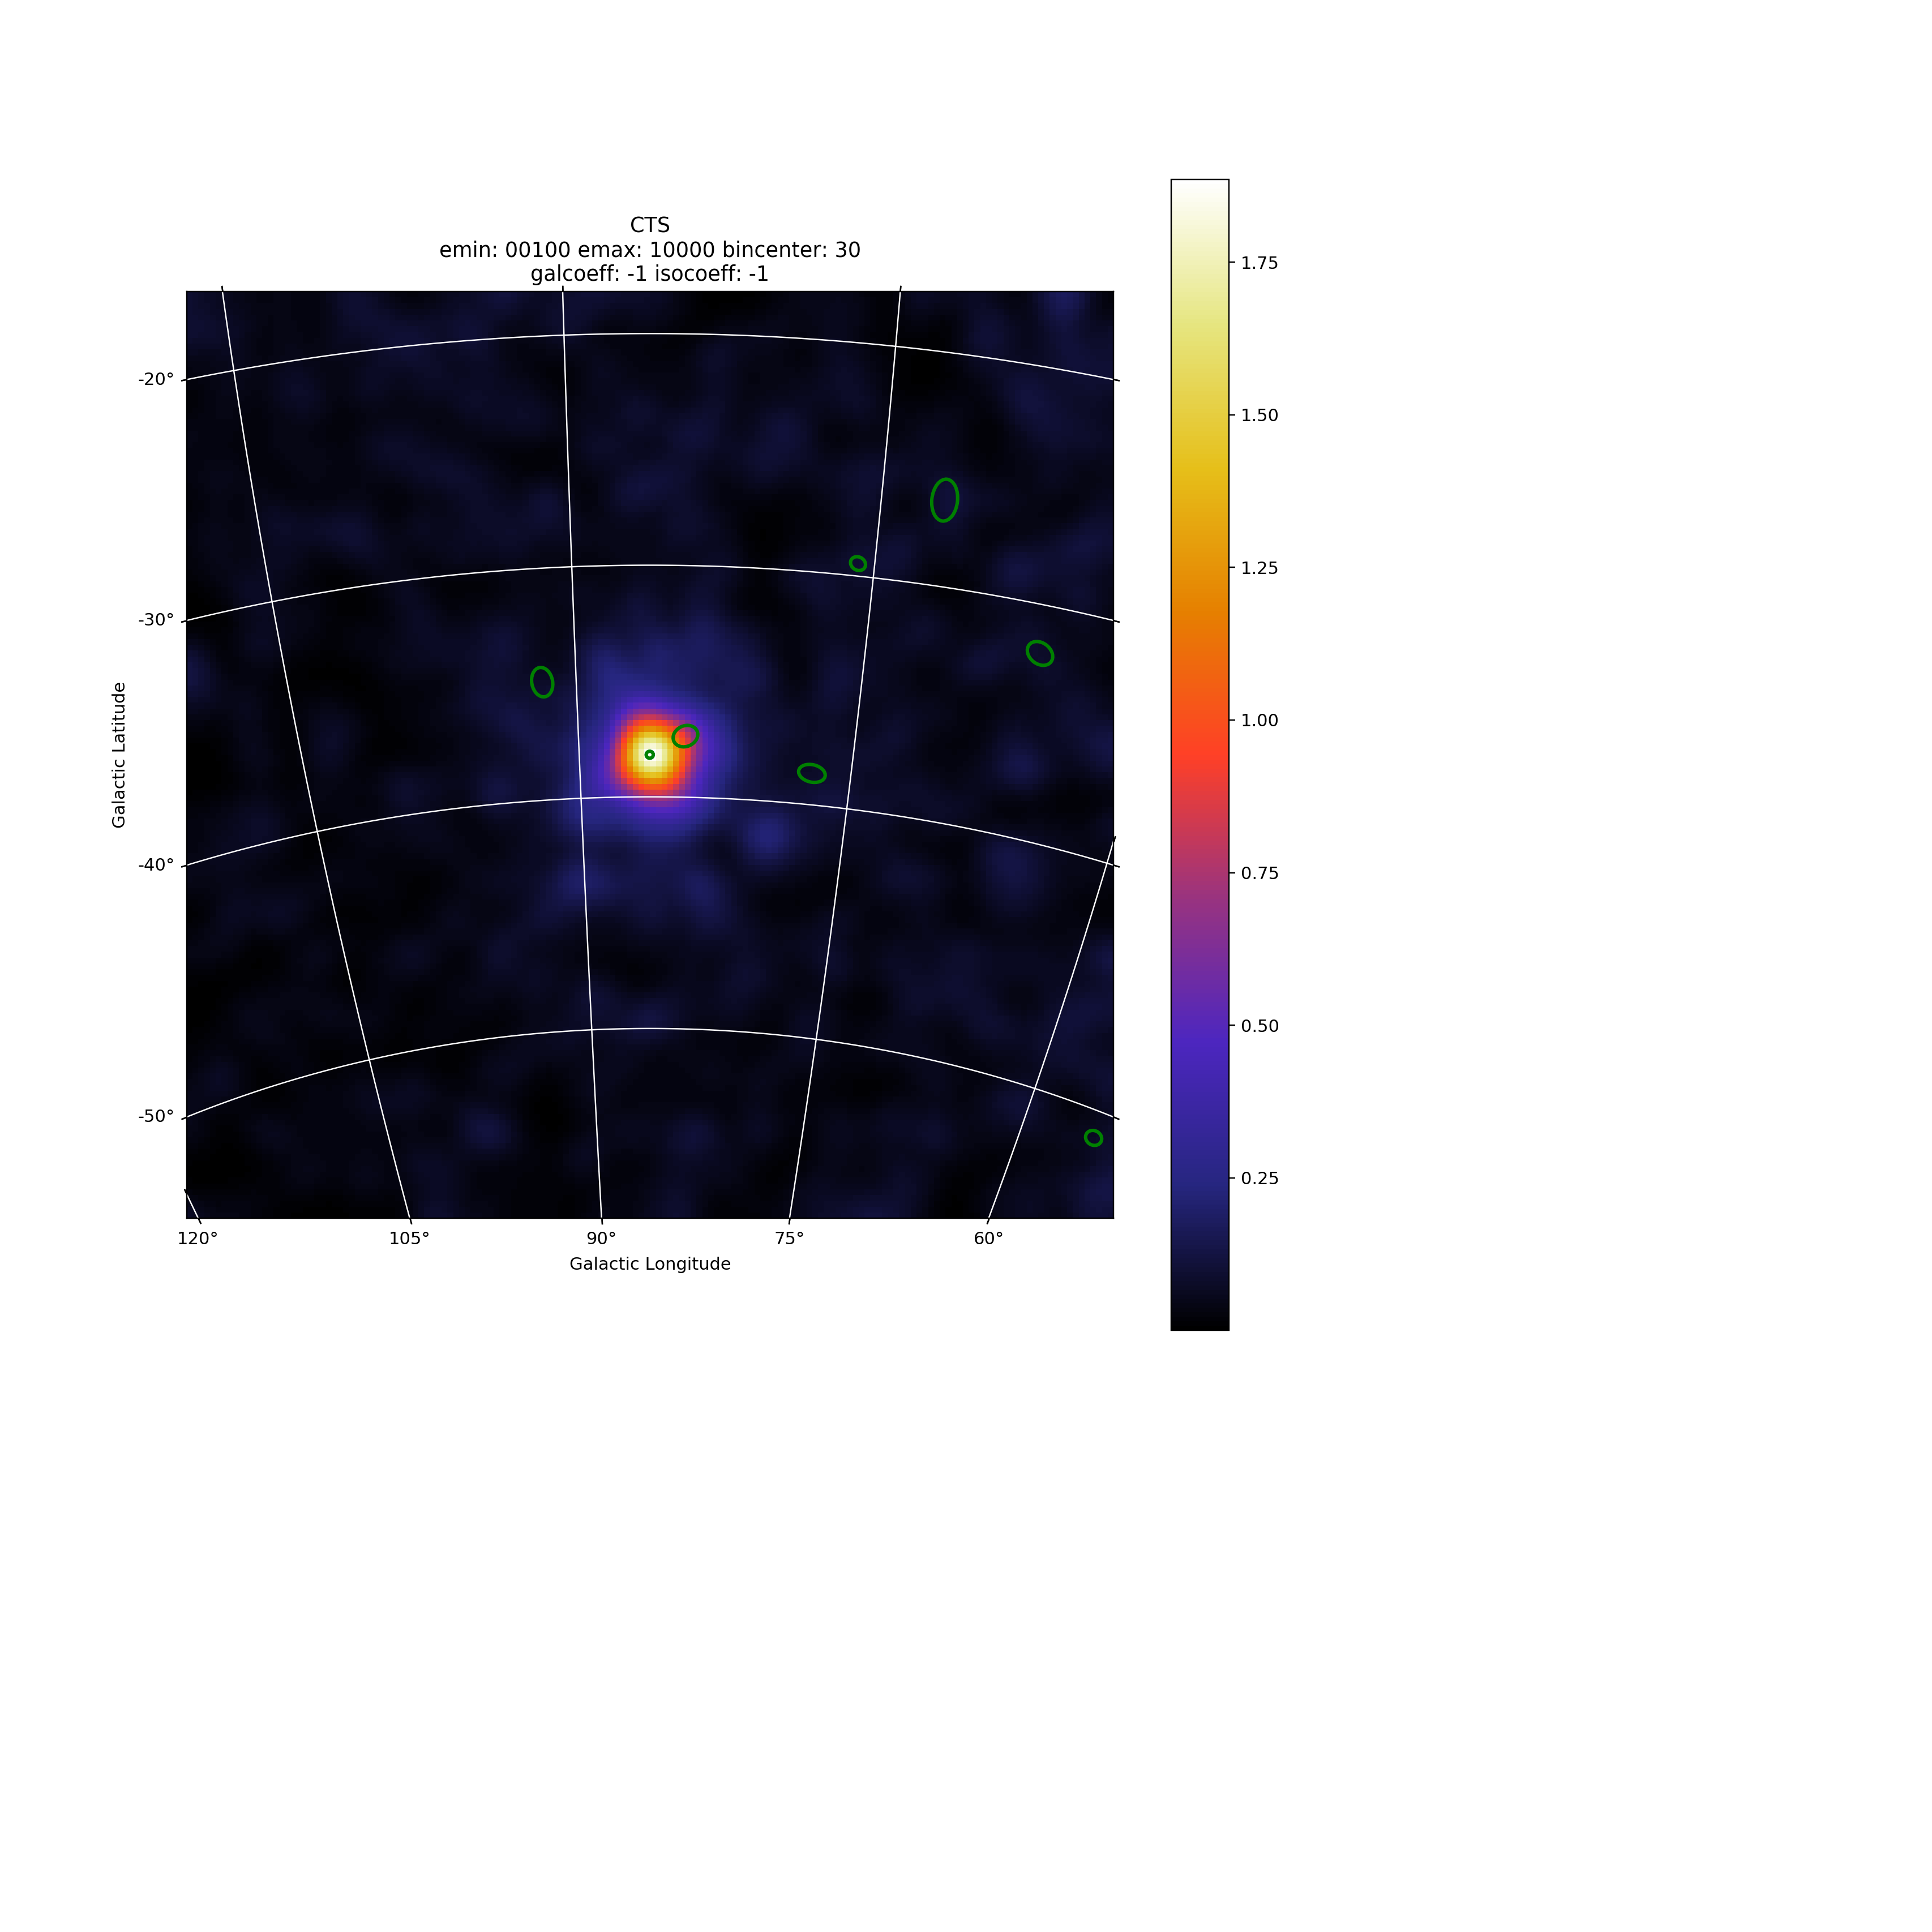

[None]

In [53]:
ag.displayCtsSkyMaps(smooth=3, catalogRegions="2AGL", catalogRegionsColor="green")

2020-03-11 15:54:13,769 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.
2020-03-11 15:54:13,769 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


<IPython.core.display.Javascript object>


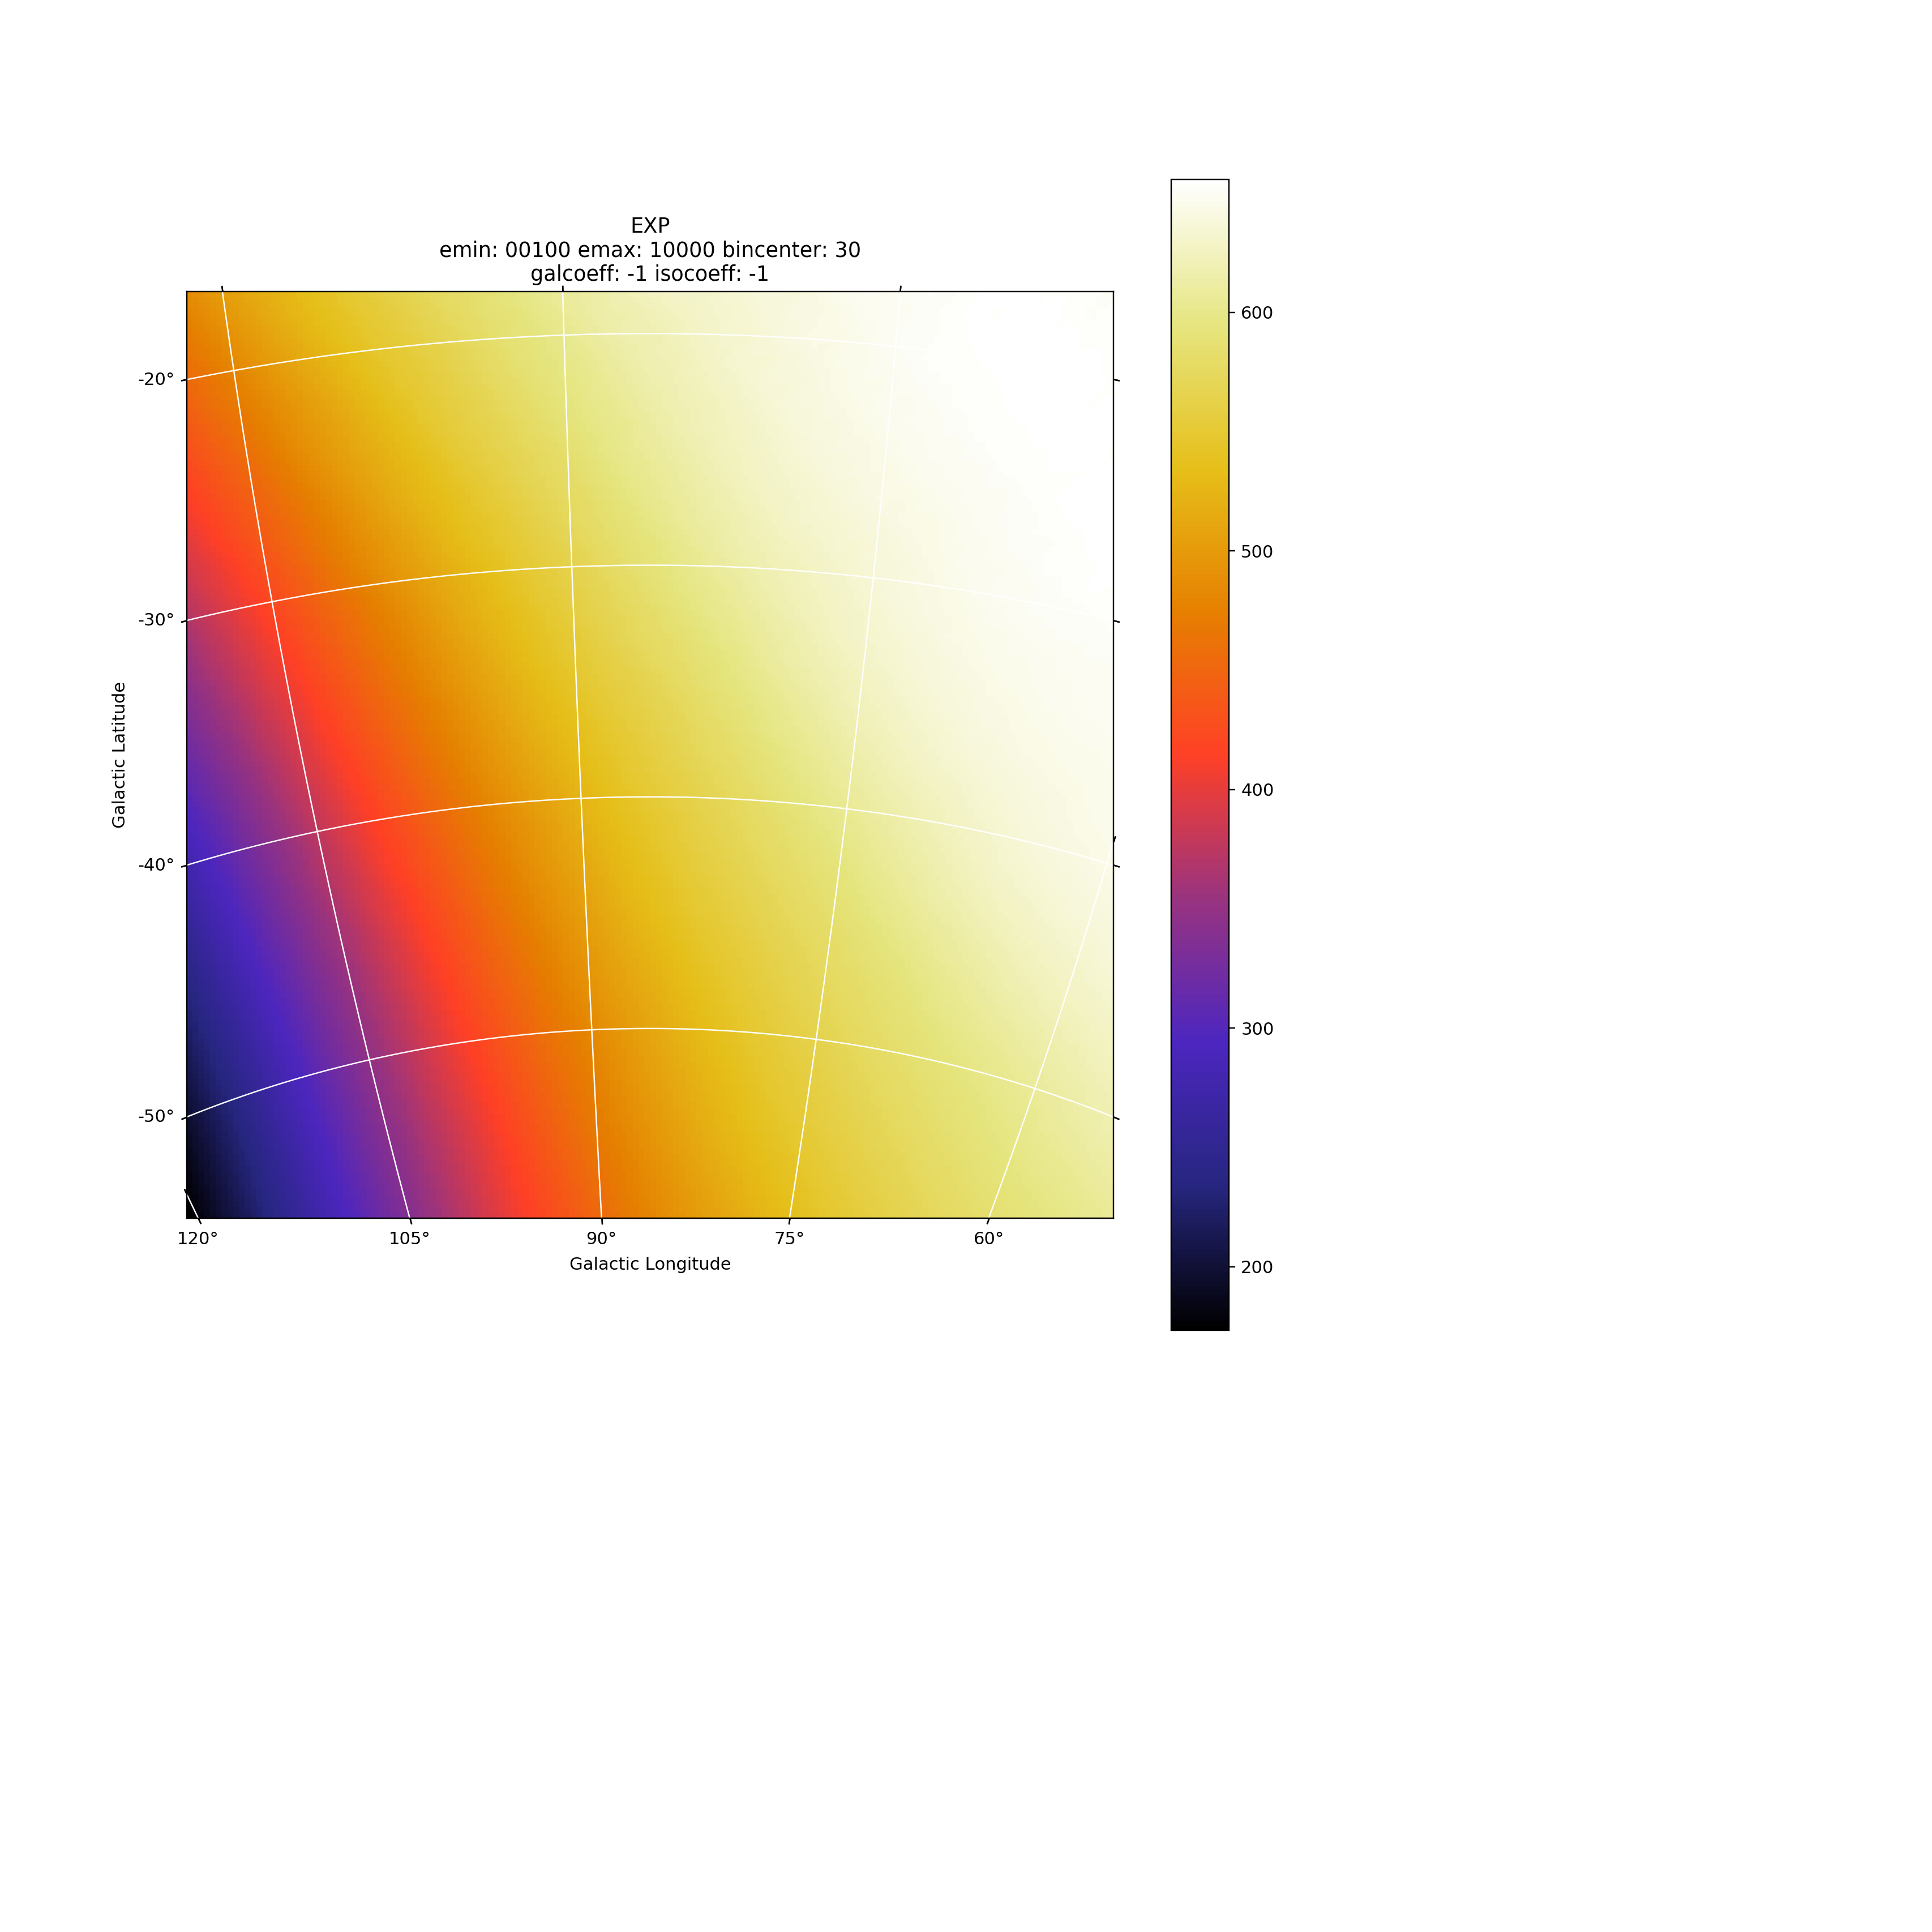

[None]

In [54]:
ag.displayExpSkyMaps()

2020-03-11 15:40:12,502 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


<IPython.core.display.Javascript object>


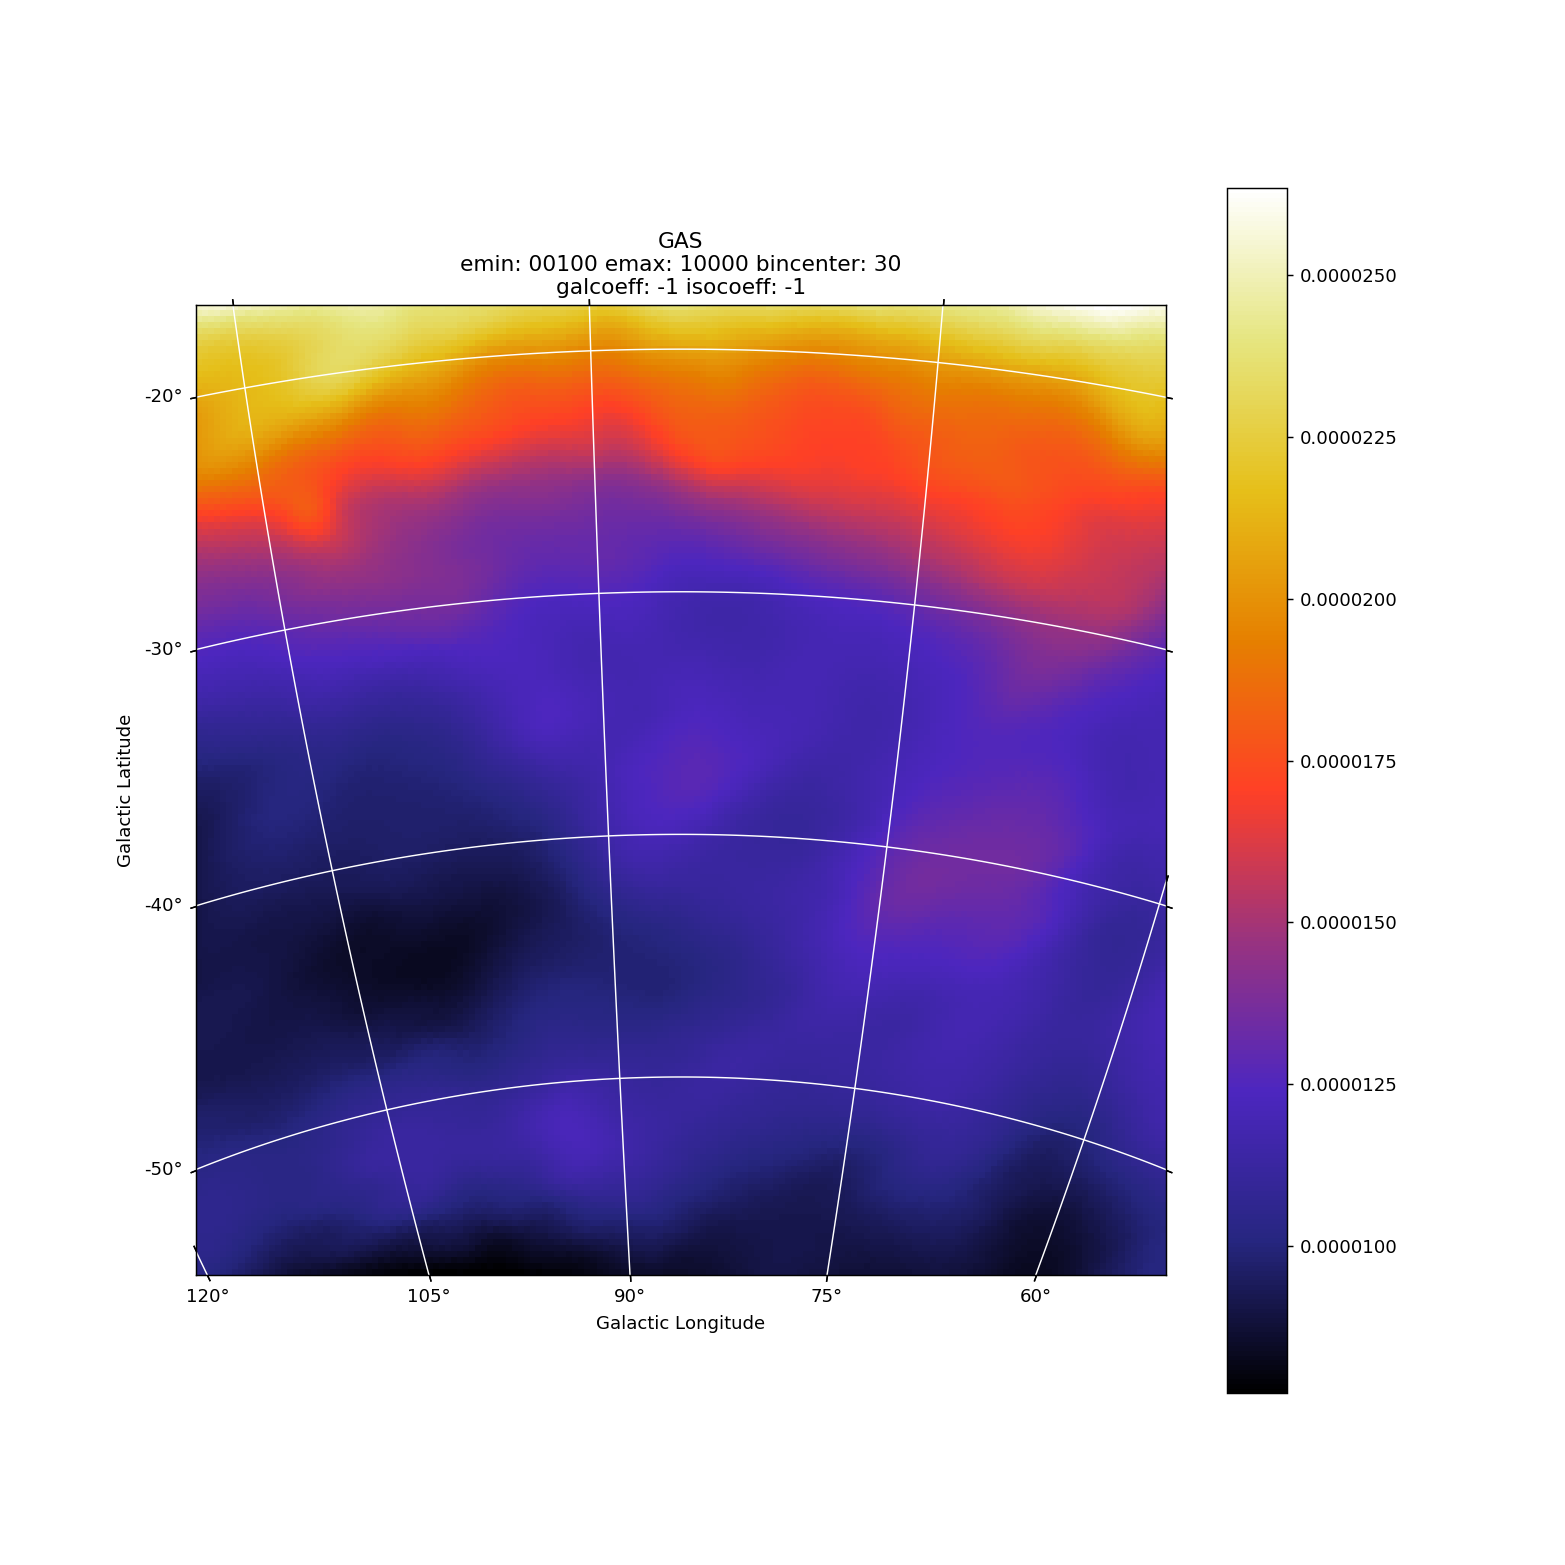

[None]

In [19]:
ag.displayGasSkyMaps()

In [20]:
ag.setOptions(galcoeff=[0])

2020-03-11 15:40:12,561 [INFO    ] [MapList] Updating galactic coefficients: ['0']
2020-03-11 15:40:12,563 [INFO    ] [MapList] Produced: /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/3C454d3_product.maplist4


In [21]:
! cat $maplistfile

/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.cts.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.gas.gz 30 0 -1


In [22]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [0],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [-1],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [23]:
gal,iso,maplist = ag.calcBkg("2AGLJ2254+1609", galcoeff = None, pastTimeWindow = 14)

2020-03-11 15:40:12,714 [INFO    ] [AGAnalysis] tmin: 215481600.000000 tmax: 216691200.000000 type: TT
2020-03-11 15:40:12,716 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-11 15:40:17,173 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.cts.gz']
2020-03-11 15:40:17,175 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-11 15:41:06,453 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.exp.gz']
2020-03-11 15:41:06,455 [INFO    ] [GasMapGenerator] Science tool called!
2020-03-11 15:41:07,530 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/calcBkg/maps/calcBkg_EMIN00100_EMAX10000_01.gas.gz']
2020-03-11 15:41:07,532 [INFO    ] [IntMapGenerator] Science to

In [24]:
! cat $maplistfile

/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.cts.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.gas.gz 30 6.96609e-08 10.0539


In [25]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [6.96609e-08],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [10.0539],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [26]:
ag.mle()

2020-03-11 15:41:09,021 [INFO    ] [SourcesLibrary] File /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/sourceLibrary00000.txt has been produced
2020-03-11 15:41:09,023 [INFO    ] [Multi] Science tool called!
2020-03-11 15:41:09,538 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/mle/3C454d3_product0000_2AGLJ2254+1609.source']
2020-03-11 15:41:09,542 [INFO    ] [AGAnalysis] Took 0.523002 seconds.


['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/mle/3C454d3_product0000_2AGLJ2254+1609.source']

In [27]:
ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 37.7361
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
  * Multi analysis:
	- flux(ph/cm2s): 1.45398e-05 +- 7.54683e-07
	- upper limit(ph/cm2s): 1.60933e-05
	- ergLog(erg/cm2s): 2.34987e-09 +- 1.21969e-10
	- galCoeff: [6.96609e-08]
	- isoCoeff: [10.0539]
	- exposure(cm2s): 29194100.0
	- exp-ratio: 0.0
-----------------------------------------------------------


In [28]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [6.96609e-08],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [10.0539],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [29]:
ag.setOptions(isocoeff=[8.76633])

2020-03-11 15:41:09,577 [INFO    ] [MapList] Updating isotropic coefficients: ['8.76633']
2020-03-11 15:41:09,579 [INFO    ] [MapList] Produced: /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/3C454d3_product.maplist4


In [30]:
! cat $maplistfile

/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.cts.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.exp.gz /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/maps/3C454d3_product_EMIN00100_EMAX10000_01.gas.gz 30 6.96609e-08 8.76633


In [31]:
ag.mle()

2020-03-11 15:41:09,717 [INFO    ] [SourcesLibrary] File /home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/sourceLibrary00000.txt has been produced
2020-03-11 15:41:09,719 [INFO    ] [Multi] Science tool called!
2020-03-11 15:41:10,224 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/mle/3C454d3_product0000_2AGLJ2254+1609.source']
2020-03-11 15:41:10,228 [INFO    ] [AGAnalysis] Took 0.514039 seconds.


['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/mle/3C454d3_product0000_2AGLJ2254+1609.source']

In [32]:
ag.selectSources("sqrtTS > 0")


-----------------------------------------------------------
Source name: 2AGLJ2254+1609 (PointSource) => sqrt(ts): 39.473
  * Position:
	- start_pos: (86.1236, -38.1824)
	- dist from (l,b): 0.011
  * Spectrum: (PowerLaw)
	- flux: 7.50937e-07
	- index: 2.20942
  * Free params: flux
  * Multi analysis:
	- flux(ph/cm2s): 1.51134e-05 +- 7.63343e-07
	- upper limit(ph/cm2s): 1.66839e-05
	- ergLog(erg/cm2s): 2.44256e-09 +- 1.23369e-10
	- galCoeff: [6.96609e-08]
	- isoCoeff: [8.76633]
	- exposure(cm2s): 29194100.0
	- exp-ratio: 0.0
-----------------------------------------------------------


In [33]:
lightCurveData = ag.lightCurve("2AGLJ2254+1609", binsize=86400)

2020-03-11 15:41:10,252 [INFO    ] [AGAnalysis] Number of processes: 1, Number of bins per process 7
2020-03-11 15:41:10,256 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-11 15:41:13,115 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/lc/bin_216691200_216777600/maps/lc_analysis_EMIN00100_EMAX10000_01.cts.gz']
2020-03-11 15:41:13,117 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-11 15:41:19,352 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/lc/bin_216691200_216777600/maps/lc_analysis_EMIN00100_EMAX10000_01.exp.gz']
2020-03-11 15:41:19,354 [INFO    ] [GasMapGenerator] Science tool called!
2020-03-11 15:41:20,467 [INFO    ] [AGAnalysis] Science tool gasMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/lc/bin_216691200_216777600/maps/lc_analysis_EMIN00100_EMAX10000_01.gas.g

2020-03-11 15:41:55,903 [INFO    ] [Multi] Science tool called!
2020-03-11 15:41:56,648 [INFO    ] [AGAnalysis] AG_multi produced: ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/lc/bin_216950400_217036800/mle/lc_analysis0000_2AGLJ2254+1609.source']
2020-03-11 15:41:56,650 [INFO    ] [AGAnalysis] Took 0.748378 seconds.
2020-03-11 15:41:56,653 [INFO    ] [CtsMapGenerator] Science tool called!
2020-03-11 15:41:59,380 [INFO    ] [AGAnalysis] Science tool ctsMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/lc/bin_217036800_217123200/maps/lc_analysis_EMIN00100_EMAX10000_01.cts.gz']
2020-03-11 15:41:59,381 [INFO    ] [ExpMapGenerator] Science tool called!
2020-03-11 15:42:04,856 [INFO    ] [AGAnalysis] Science tool expMapGenerator produced:
 ['/home/rt/agilepy_analysis/bulgarelli_3C454d3_20200311-153939/lc/bin_217036800_217123200/maps/lc_analysis_EMIN00100_EMAX10000_01.exp.gz']
2020-03-11 15:42:04,859 [INFO    ] [GasMapGenerator] Science t

In [34]:
! cat $lightCurveData

(0)sqrtts (6)time_mjd (7)time_tt (8)time_utc (9)flux*10^-8 (10)flux_err*10^-8 (11)flux_ul*10^-8 
39.341 55513.0/55520.0 216691200.0/217296000.0 2010-11-13T00:00:00/2010-11-20T00:00:00 39.341 6.85201e-07 1.51269e-05
39.1842 55513.0/55520.0 216691200.0/217296000.0 2010-11-13T00:00:00/2010-11-20T00:00:00 39.1842 6.1938e-07 1.37787e-05
39.7333 55513.0/55520.0 216691200.0/217296000.0 2010-11-13T00:00:00/2010-11-20T00:00:00 39.7333 5.76223e-07 1.30787e-05
40.3676 55513.0/55520.0 216691200.0/217296000.0 2010-11-13T00:00:00/2010-11-20T00:00:00 40.3676 5.40639e-07 1.25533e-05
43.5478 55513.0/55520.0 216691200.0/217296000.0 2010-11-13T00:00:00/2010-11-20T00:00:00 43.5478 5.3774e-07 1.3229e-05
49.8819 55513.0/55520.0 216691200.0/217296000.0 2010-11-13T00:00:00/2010-11-20T00:00:00 49.8819 5.38758e-07 1.4787e-05
55.8267 55513.0/55520.0 216691200.0/217296000.0 2010-11-13T00:00:00/2010-11-20T00:00:00 55.8267 5.39795e-07 1.62153e-05
